In [1]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt


import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")
import datetime
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble

In [76]:
df_rfm = pd.read_csv("rfm_segmentation.csv")

In [77]:
tag = {"Best":1, "Loyal": 1, "BigSpenders":1, "AlmostLost": 1, "Lost":0, "LostCheap":0, "Others":0}

In [78]:
df_rfm.set_index('CustomerID',inplace=True)

In [79]:
df_rfm.head()

,LastPurshaceDate,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,,
12346.0,2011-01-18,325,1,77183.60,2.0,1,1,4,114
12747.0,2011-12-07,2,10,658.89,183.0,4,4,4,444
12748.0,2011-12-09,0,196,3739.23,34.0,4,4,4,444
12749.0,2011-12-06,3,5,98.35,1140.0,4,3,3,433
12820.0,2011-12-06,3,4,58.20,1665.5,4,3,3,433


In [80]:
def classifier(CustomerID , RFMScore, F_Quartile, M_Quartile, data):
    if(data[RFMScore][CustomerID]=='444'):
        return 'Best'
    elif(data[F_Quartile][CustomerID]==4):
        return 'Loyal'
    elif(data[M_Quartile][CustomerID]==4):
        return 'BigSpenders'
    elif(data[RFMScore][CustomerID]=='244'):
        return 'AlmostLost'
    elif(data[RFMScore][CustomerID]=='144'):
        return 'Lost'
    elif(data[RFMScore][CustomerID]=='111'):
        return 'LostCheap'
    else:
        return 'Others'

In [81]:
df = pd.read_csv("copy.csv")

In [82]:
df_ml = df
df_ml.set_index('CustomerID',inplace=True)
df_ml.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerClass
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114,BigSpenders
12347.0,2,7,163.16,889.0,4,4,4,444,Best
12348.0,75,4,331.36,447.0,2,3,4,234,BigSpenders
12349.0,18,1,15.00,3524.5,3,1,1,311,Others
12350.0,310,1,25.20,2890.0,1,1,2,112,Others


In [50]:
df_ml["CustomerClass"] = df_ml["CustomerClass"].map(tag)

In [83]:
df_ml.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerClass
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114,BigSpenders
12347.0,2,7,163.16,889.0,4,4,4,444,Best
12348.0,75,4,331.36,447.0,2,3,4,234,BigSpenders
12349.0,18,1,15.00,3524.5,3,1,1,311,Others
12350.0,310,1,25.20,2890.0,1,1,2,112,Others


In [84]:
df_ml.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerClass
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114,BigSpenders
12347.0,2,7,163.16,889.0,4,4,4,444,Best
12348.0,75,4,331.36,447.0,2,3,4,234,BigSpenders
12349.0,18,1,15.00,3524.5,3,1,1,311,Others
12350.0,310,1,25.20,2890.0,1,1,2,112,Others


## Principle Component Analysis

In [85]:
tag = {"Best":1, "Loyal": 2, "BigSpenders":3, "AlmostLost": 4, "Lost":5, "LostCheap":6, "Others":7}

In [86]:
df_pca = df_rfm

In [87]:
df_pca.head()

,LastPurshaceDate,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,,
12346.0,2011-01-18,325,1,77183.60,2.0,1,1,4,114
12747.0,2011-12-07,2,10,658.89,183.0,4,4,4,444
12748.0,2011-12-09,0,196,3739.23,34.0,4,4,4,444
12749.0,2011-12-06,3,5,98.35,1140.0,4,3,3,433
12820.0,2011-12-06,3,4,58.20,1665.5,4,3,3,433


In [88]:
df_pca.drop(["LastPurshaceDate"], inplace=True, axis=1)

In [89]:
index_names = df_ml[ df_ml['CustomerClass'] == "Others" ].index 
df_ml.drop(index_names, inplace = True) 

In [90]:
df_ml.count()

Recency          1728
Frequency        1728
Monetary         1728
Rank             1728
R_Quartile       1728
F_Quartile       1728
M_Quartile       1728
RFMScore         1728
CustomerClass    1728
dtype: int64

In [91]:
df_ml.tail()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerClass
CustomerID,,,,,,,,,
18260.0,172,6,150.57,950.0,1,4,4,144,Loyal
18272.0,2,6,78.32,1581.0,4,4,3,443,Loyal
18273.0,2,3,204.00,713.5,4,3,4,434,BigSpenders
18281.0,180,1,5.04,4092.0,1,1,1,111,LostCheap
18283.0,3,16,66.75,1780.0,4,4,3,443,Loyal


In [92]:
columns = ["Recency", "Frequency", "Monetary"]
X = df_ml[columns].values
Y = df_ml["CustomerClass"].values

In [93]:
 from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X = sc.fit_transform(X) 

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [95]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [96]:
principalDf.head()

,principal component 1,principal component 2
0,3.553937,15.077140
1,0.481755,-0.415616
2,-0.098668,-0.116331
3,0.376043,-0.240836
4,0.127371,-0.317955


In [97]:
import plotly.express as px
fig = px.scatter(principalDf, x="principal component 1", y="principal component 2")
fig.show()


In [108]:
test = pd.DataFrame()
test = df_ml[["CustomerClass"]]
test.reset_index(drop=True, inplace=True)
test.head()

,CustomerClass
0,BigSpenders
1,Best
2,BigSpenders
3,Loyal
4,BigSpenders


In [109]:
finalDf = pd.concat([principalDf, test[['CustomerClass']]], axis = 1)

In [110]:
finalDf.head()

,principal component 1,principal component 2,CustomerClass
0,3.553937,15.077140,BigSpenders
1,0.481755,-0.415616,Best
2,-0.098668,-0.116331,BigSpenders
3,0.376043,-0.240836,Loyal
4,0.127371,-0.317955,BigSpenders


In [111]:
finalDf.tail()

,principal component 1,principal component 2,CustomerClass
1723,-0.536604,0.156985,Loyal
1724,0.415684,-0.423264,Loyal
1725,0.243402,-0.375289,BigSpenders
1726,-0.892997,0.197398,LostCheap
1727,1.012110,-0.503862,Loyal


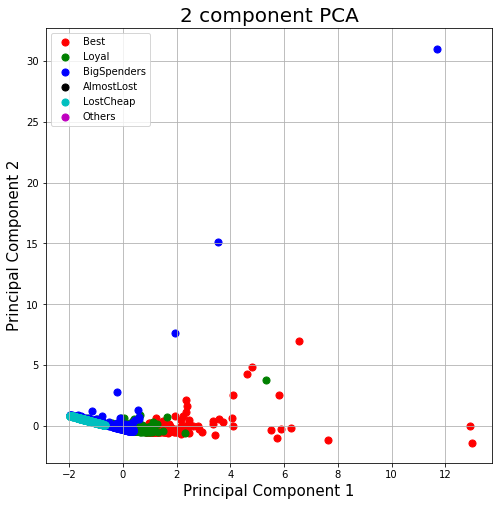

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Best','Loyal','BigSpenders','AlmostLost','LostCheap','Others']
colors = ['r', 'g', 'b','k','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CustomerClass'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Machine Learning

In [158]:
columns = ["Recency", "Frequency", "Monetary", "R_Quartile", "F_Quartile", "M_Quartile"]
X = df_ml[columns]
Y = df_ml["CustomerClass"]

In [159]:
 from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X = sc.fit_transform(X) 

In [160]:
np.save('X', X)
np.save('Y',Y)

In [161]:
X.shape

(4339, 6)

In [162]:
Y.shape

(4339,)

In [163]:
Y


CustomerID
12346.0    1
12347.0    1
12348.0    1
12349.0    0
12350.0    0
          ..
18280.0    0
18281.0    0
18282.0    0
18283.0    1
18287.0    0
Name: CustomerClass, Length: 4339, dtype: int64